In [1]:
!pip install -U -q kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hariharanfut","key":"f2bbe3e49912bce8e0bc547455cf3ef4"}'}

In [4]:
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d nancychen0129/caltech101
!unzip /content/caltech101.zip

Streaming output truncated to the last 5000 lines.
  inflating: Caltech101/train/Motorbikes/image_0607.jpg  
  inflating: Caltech101/train/Motorbikes/image_0609.jpg  
  inflating: Caltech101/train/Motorbikes/image_0612.jpg  
  inflating: Caltech101/train/Motorbikes/image_0614.jpg  
  inflating: Caltech101/train/Motorbikes/image_0615.jpg  
  inflating: Caltech101/train/Motorbikes/image_0616.jpg  
  inflating: Caltech101/train/Motorbikes/image_0617.jpg  
  inflating: Caltech101/train/Motorbikes/image_0618.jpg  
  inflating: Caltech101/train/Motorbikes/image_0619.jpg  
  inflating: Caltech101/train/Motorbikes/image_0620.jpg  
  inflating: Caltech101/train/Motorbikes/image_0621.jpg  
  inflating: Caltech101/train/Motorbikes/image_0622.jpg  
  inflating: Caltech101/train/Motorbikes/image_0623.jpg  
  inflating: Caltech101/train/Motorbikes/image_0624.jpg  
  inflating: Caltech101/train/Motorbikes/image_0625.jpg  
  inflating: Caltech101/train/Motorbikes/image_0626.jpg  
  inflating: Caltech1

In [16]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import imageio
import skimage.transform
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D ,GlobalAveragePooling2D
%matplotlib inline
import tensorflow as tf
import tensorflow_datasets as tfdb
import keras
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import scipy

In [7]:
def imread(path):
    img = imageio.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
path = '/content/Caltech101/train'
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
train = []
train_labels = []
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = skimage.transform.resize(imageio.imread(fullpath), [64,64, 3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            train.append(img) # NORMALIZE IMAGE 
            label_curr = i
            train_labels.append(label_curr)
        #iter = (iter+1)%10;
print ("Num imgs: %d" % (len(train)))
print ("Num labels: %d" % (len(train_labels)) )
print (ncategories)

[101] CATEGORIES ARE IN 
 /content/Caltech101/train
Num imgs: 6162
Num labels: 6162
101


In [8]:
def imread(path):
    img = imageio.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
path = '/content/Caltech101/test'
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
test = []
test_labels = []
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = skimage.transform.resize(imageio.imread(fullpath), [64,64, 3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            test.append(img) # NORMALIZE IMAGE 
            label_curr = i
            test_labels.append(label_curr)
        #iter = (iter+1)%10;
print ("Num imgs: %d" % (len(test)))
print ("Num labels: %d" % (len(test_labels)) )
print (ncategories)

[101] CATEGORIES ARE IN 
 /content/Caltech101/test
Num imgs: 1695
Num labels: 1695
101


In [9]:
def imread(path):
    img = imageio.imread(path).astype(np.float)
    if len(img.shape) == 2:
        img = np.transpose(np.array([img, img, img]), (2, 0, 1))
    return img
    
path = '/content/Caltech101/eval'
valid_exts = [".jpg", ".gif", ".png", ".jpeg"]
print ("[%d] CATEGORIES ARE IN \n %s" % (len(os.listdir(path)), path))

categories = sorted(os.listdir(path))
ncategories = len(categories)
vald = []
vald_labels = []
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    iter = 0
    for f in os.listdir(path + "/" + category):
        if iter == 0:
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_exts:
                continue
            fullpath = os.path.join(path + "/" + category, f)
            img = skimage.transform.resize(imageio.imread(fullpath), [64,64, 3])
            img = img.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            vald.append(img) # NORMALIZE IMAGE 
            label_curr = i
            vald_labels.append(label_curr)
        #iter = (iter+1)%10;
print ("Num imgs: %d" % (len(vald)))
print ("Num labels: %d" % (len(vald_labels)) )
print (ncategories)

[101] CATEGORIES ARE IN 
 /content/Caltech101/eval
Num imgs: 820
Num labels: 820
101


In [10]:
X_train= np.array(train)
X_train= X_train/255.0

X_test= np.array(test)
X_test= X_test/255.0

X_vald= np.array(vald)
X_vald= X_vald/255.0

In [11]:
X_train = np.stack(X_train, axis=0)
X_test = np.stack(X_test, axis=0)
X_vald = np.stack(X_vald, axis=0)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical( train_labels, num_classes = 102)
y_testHot = to_categorical( test_labels, num_classes = 102)
y_valdHot = to_categorical( vald_labels, num_classes = 102)

In [14]:
base_model = keras.applications.densenet.DenseNet201(weights='imagenet', include_top=False, input_shape=(64,64, 3))

74842112/74836368 [==============================] - 3s 0us/step


In [20]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(102, activation="softmax")(x)

In [23]:
model = Model(inputs=base_model.input, outputs=predictions)

# Lock initial layers to do not be trained
for layer in model.layers[:52]:
    layer.trainable = False


In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [25]:
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9),
              metrics=['acc'])

In [26]:
a = X_train
b = y_trainHot

In [27]:
history = model.fit(a, b, epochs=300, batch_size=128, validation_data=(X_vald,y_valdHot))

Train on 6162 samples, validate on 820 samples
Epoch 1/300
6162/6162 [==============================] - 95s 15ms/step - loss: 5.0050 - acc: 0.0203 - val_loss: 5.0930 - val_acc: 0.0976
Epoch 2/300
6162/6162 [==============================] - 29s 5ms/step - loss: 4.5506 - acc: 0.0813 - val_loss: 10.1831 - val_acc: 0.0976
Epoch 3/300
6162/6162 [==============================] - 29s 5ms/step - loss: 4.1574 - acc: 0.1709 - val_loss: 13.7292 - val_acc: 0.0976
Epoch 4/300
6162/6162 [==============================] - 29s 5ms/step - loss: 3.8567 - acc: 0.2230 - val_loss: 17.9456 - val_acc: 0.0073
Epoch 5/300
6162/6162 [==============================] - 29s 5ms/step - loss: 3.6799 - acc: 0.2447 - val_loss: 20.8389 - val_acc: 0.0073
Epoch 6/300
6162/6162 [==============================] - 29s 5ms/step - loss: 3.5391 - acc: 0.2616 - val_loss: 22.9556 - val_acc: 0.0963
Epoch 7/300
6162/6162 [==============================] - 29s 5ms/step - loss: 3.4618 - acc: 0.2687 - val_loss: 25.7649 - val_acc: 0

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_testHot)
print("Test Loss: ", test_loss*100)
print("Test Accuracy: ", test_acc*100)

1695/1695 [==============================] - 2s 1ms/step
Test Loss:  2.1431942286528236
Test Accuracy:  99.47885274887085


VGG -Validation Loss:  1.9660495221614838
VGG - Validation Accuracy:  99.50503706932068


VGG - Training Loss:  1.7669726756523179
VGG - Training Accuracy:  99.54240918159485




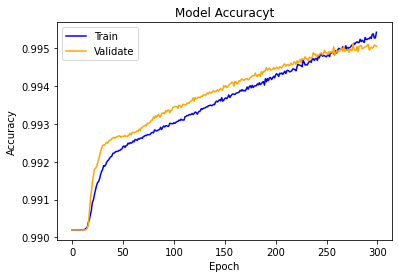

In [ ]:
plt.plot(history.history['acc'], 'blue')
plt.plot(history.history['val_acc'], 'orange')
plt.title("Model Accuracyt")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.savefig("/content/drive/My Drive/results/DenseNet201/caltech101/Model Accuracy.png")

print("VGG -Validation Loss: ", history.history['val_loss'][-1]*100)
print("VGG - Validation Accuracy: ", history.history['val_acc'][-1]*100)
print("\n")
print("VGG - Training Loss: ", history.history['loss'][-1]*100)
print("VGG - Training Accuracy: ", history.history['acc'][-1]*100)
print("\n")

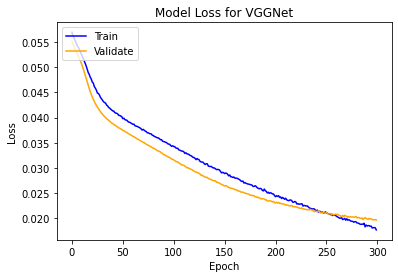

In [ ]:
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'orange')
plt.title("Model Loss for VGGNet")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.savefig("/content/drive/My Drive/results/DenseNet201/caltech101/Model Loss.png")


In [ ]:
from tensorflow.keras import Model
import h5py
from keras.models import load_model
fashion_model.save('/content/drive/My Drive/results/DenseNet201/caltech101/caltech101-DenseNet201.h5')

In [ ]:
output = model.predict(X_test)
output = np.argmax(np.round(output),axis=1)

In [ ]:
print(np.unique(output))
set(test_labels) - set(output)

[  0   1   2   3   4   5  12  13  15  16  17  19  20  21  22  23  25  30
  31  32  33  34  35  38  39  40  41  46  47  48  50  52  53  55  56  57
  58  60  63  64  65  66  69  70  71  72  74  75  77  79  80  81  84  85
  86  88  89  90  92  93  94  95  96  98 100]


{6,
 7,
 8,
 9,
 10,
 11,
 14,
 18,
 24,
 26,
 27,
 28,
 29,
 36,
 37,
 42,
 43,
 44,
 45,
 49,
 51,
 54,
 59,
 61,
 62,
 67,
 68,
 73,
 76,
 78,
 82,
 83,
 87,
 91,
 97,
 99}

In [ ]:
target_names = []
for i in range(101):
    a = 'Object '
    b = str(i)
    c = a+b
    c = [i]
    target_names.append((a+b))

def reports(X_test,y_test):
    Y_pred = model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)

    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    score = model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss = score[0]*100
    Test_accuracy = score[1]*100
    kc=cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    #mse=mean_squared_error(y_test, y_pred)
    #mae=mean_absolute_error(y_test, y_pred)
    #precision=precision_score(y_test, y_pred, average='weighted')
    #print(classification_report(y_test, y_pred, target_names=target_names))


    
    return classification, confusion, Test_Loss, Test_accuracy ,kc#,mse,mae

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score
# calculate result, loss, accuray and confusion matrix
classification, confusion, Test_loss, Test_accuracy,kc = reports(X_test,y_testHot)
classification = str(classification)
confusion_str = str(confusion)

 224/1695 [==>...........................] - ETA: 1s

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1695/1695 [==============================] - 1s 710us/step


In [ ]:
print("confusion matrix: ")
print('{}'.format(confusion_str))
print("KAppa Coeefecient=",kc)
print('Test loss {} (%)'.format(Test_loss))
print('Test accuracy {} (%)'.format(Test_accuracy))
#print("Mean Squared error=",mse)
#print("Mean absolute error=",mae)
print(classification)

confusion matrix: 
[[82  2  0 ...  0  0  0]
 [ 1 85  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  1  2  0]
 [ 0  0  0 ...  0  0  9]]
KAppa Coeefecient= 0.6190855103813693
Test loss 2.1431942286528236 (%)
Test accuracy 99.47885274887085 (%)
              precision    recall  f1-score   support

    Object 0       0.90      0.94      0.92        87
    Object 1       0.98      0.98      0.98        87
    Object 2       0.57      0.93      0.70        40
    Object 3       0.88      0.99      0.93       159
    Object 4       0.77      0.91      0.83        11
    Object 5       0.91      0.96      0.93       160
    Object 6       0.00      0.00      0.00         8
    Object 7       0.00      0.00      0.00         8
    Object 8       0.25      0.11      0.15         9
    Object 9       0.00      0.00      0.00        10
   Object 10       0.17      0.11      0.13         9
   Object 11       0.00      0.00      0.00         6
   Object 12   

Confusion matrix, without normalization


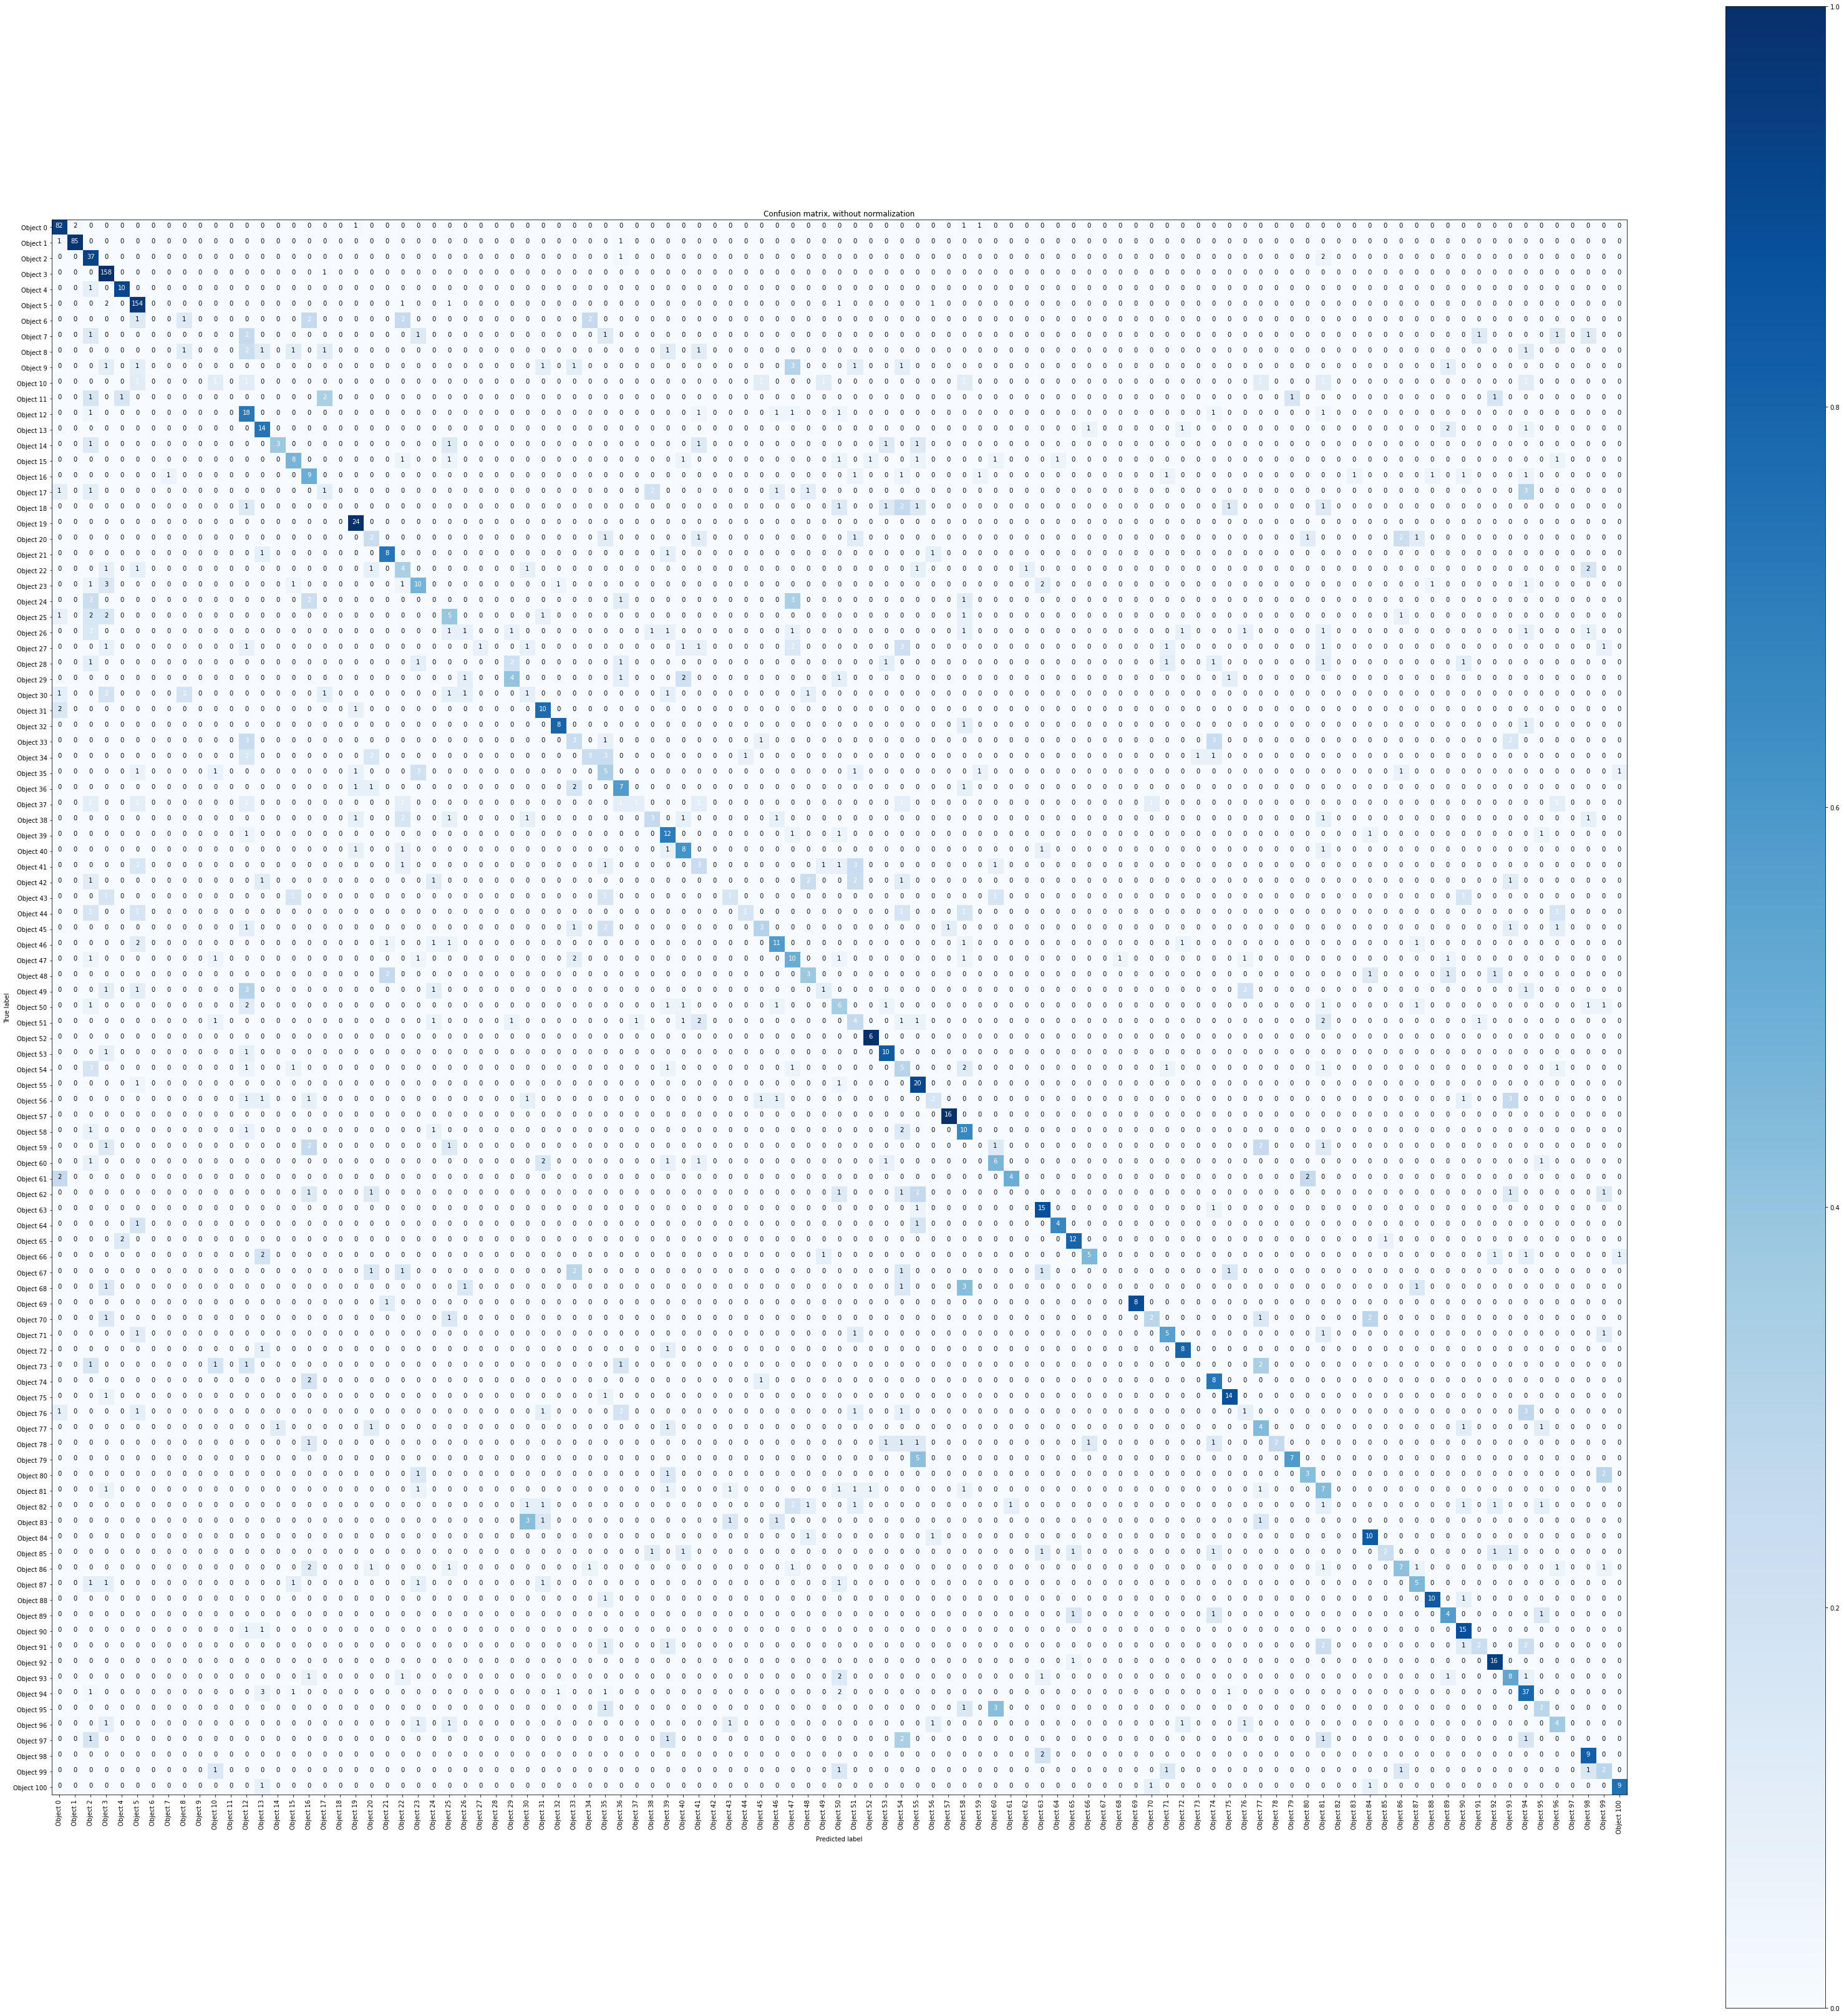

Normalized confusion matrix


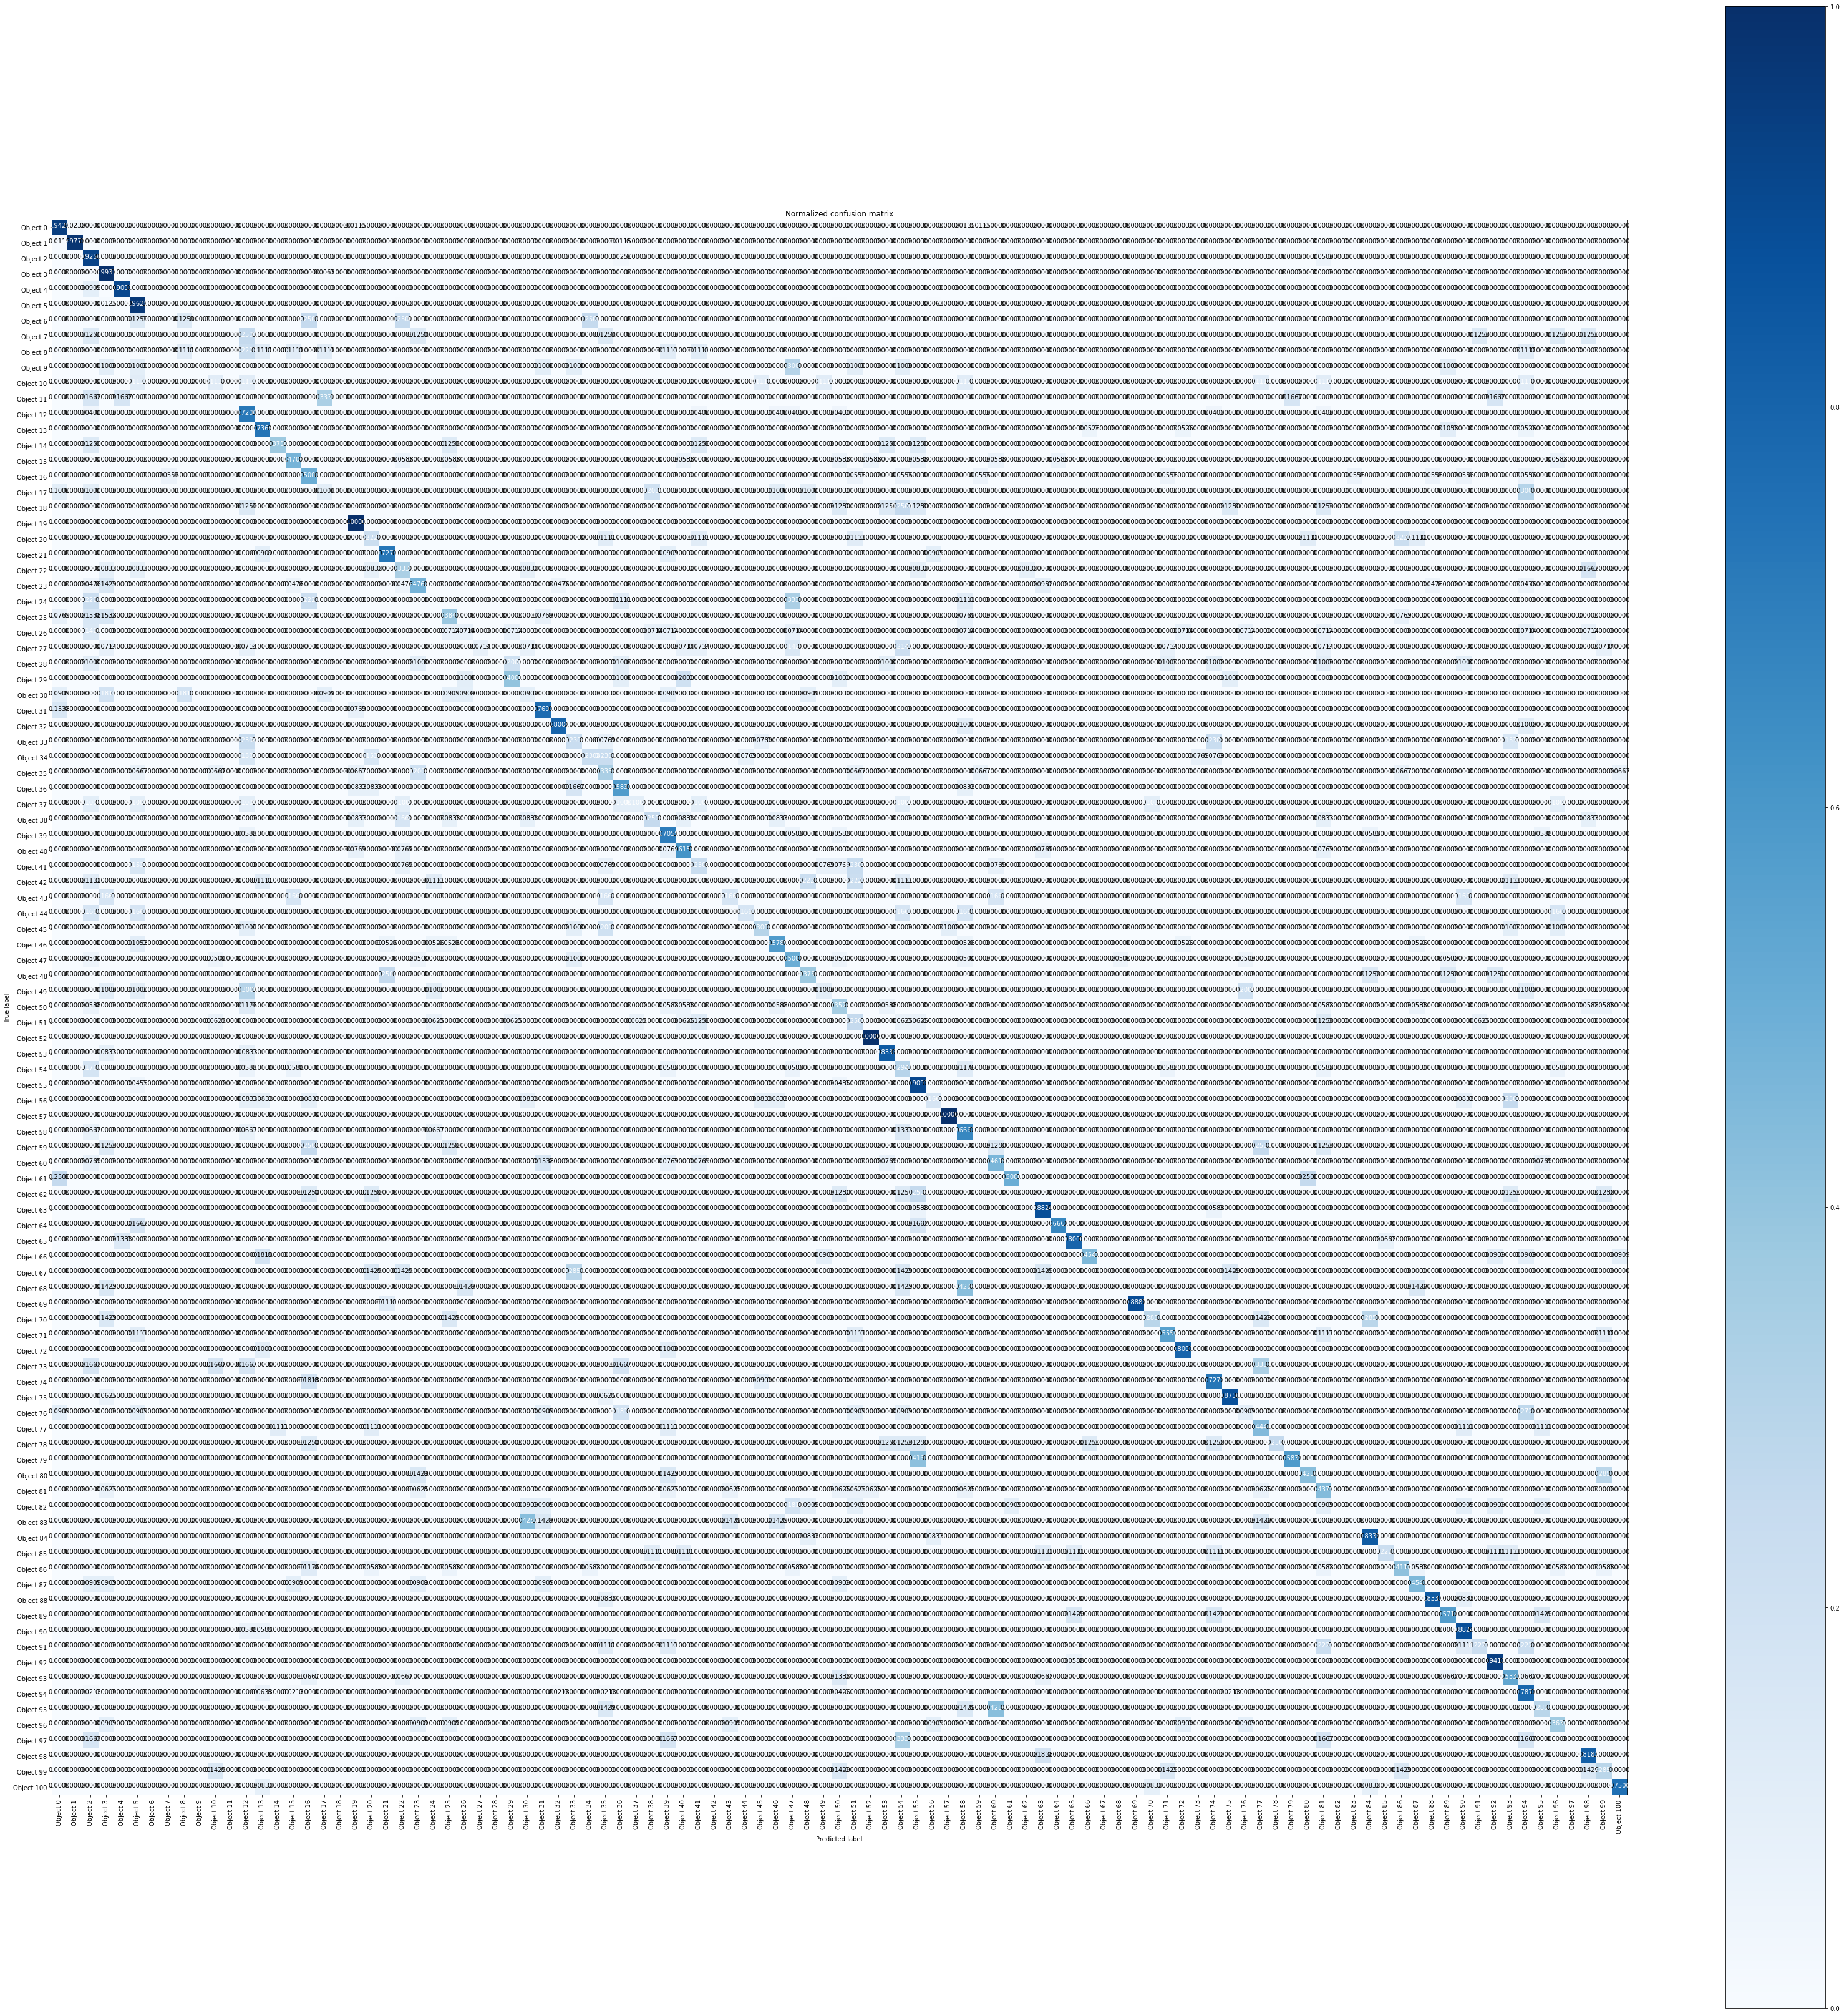

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.get_cmap("Blues")):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    Normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    if normalize:
        cm = Normalized
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(Normalized, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        thresh = cm[i].max() / 2.
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plt.figure(figsize=(100,100))
plot_confusion_matrix(confusion, classes=target_names, normalize=False, 
                      title='Confusion matrix, without normalization')
plt.savefig("/content/drive/My Drive/results/DenseNet201/caltech101/confusion_matrix_without_normalization.png")
plt.show()
plt.figure(figsize=(100,100))
plot_confusion_matrix(confusion, classes=target_names, normalize=True, 
                      title='Normalized confusion matrix')
plt.savefig("/content/drive/My Drive/results/DenseNet201/caltech101/confusion_matrix_with_normalization.png")
plt.show()